In [54]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

In [55]:
df = pd.read_excel("premiums_with_life_style.xlsx")
df.sample(20)

,Age,Gender,Region,Marital_status,Physical_Activity,Stress_Level,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
7352,20,Male,Southwest,Unmarried,Medium,Medium,0,Underweight,Regular,Freelancer,10L - 25L,18,No Disease,Bronze,9567
8316,22,Female,Northeast,Unmarried,Medium,High,0,Normal,No Smoking,Freelancer,<10L,4,No Disease,Silver,10034
692,39,Male,Southeast,Unmarried,Low,Low,0,Obesity,Regular,Self-Employed,> 40L,86,No Disease,Silver,23610
6556,52,Female,Northwest,Married,Low,Medium,3,Overweight,No Smoking,Freelancer,> 40L,95,Diabetes & High blood pressure,Gold,34604
6277,55,Female,Southwest,Married,Medium,High,3,Normal,Occasional,Self-Employed,10L - 25L,14,Thyroid,Gold,30965
5381,60,Female,Southeast,Married,Medium,Medium,5,Underweight,No Smoking,Salaried,10L - 25L,15,Diabetes,Gold,29133
6793,45,Female,Southwest,Married,Medium,High,2,Underweight,Occasional,Salaried,10L - 25L,10,High blood pressure & Heart disease,Silver,25497
1567,50,Male,Northeast,Married,Low,Medium,3,Normal,Regular,Self-Employed,<10L,6,Diabetes,Silver,24925
5243,24,Female,Southwest,Married,Medium,Medium,3,Normal,No Smoking,Freelancer,> 40L,65,No Disease,Silver,8662
2015,21,Female,Southwest,Unmarried,High,Medium,0,Obesity,No Smoking,Salaried,> 40L,73,No Disease,Silver,12413


In [56]:
df.shape

(10000, 15)

In [57]:
df.columns=df.columns.str.replace(" ","_").str.lower()

In [58]:
df.columns

Index(['age', 'gender', 'region', 'marital_status', 'physical_activity',
       'stress_level', 'number_of_dependants', 'bmi_category',
       'smoking_status', 'employment_status', 'income_level', 'income_lakhs',
       'medical_history', 'insurance_plan', 'annual_premium_amount'],
      dtype='object')

In [59]:
df.isna().sum()

age                       0
gender                    0
region                    0
marital_status            0
physical_activity         0
stress_level              0
number_of_dependants      0
bmi_category              0
smoking_status            9
employment_status         7
income_level             18
income_lakhs              0
medical_history           0
insurance_plan            0
annual_premium_amount     0
dtype: int64

In [60]:
df.dropna(inplace=True)

In [61]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
physical_activity        0
stress_level             0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

In [62]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [63]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,9973.000000,9973.000000,9973.000000,9973.000000
mean,41.319362,3.195628,23.382232,19503.816705
std,58.044687,21.679565,32.334811,8898.079736
min,18.000000,0.000000,1.000000,3582.000000
25%,24.000000,0.000000,6.000000,11774.000000
50%,37.000000,2.000000,16.000000,19314.000000
75%,50.000000,3.000000,31.000000,26500.000000
max,1178.000000,456.000000,960.000000,45854.000000


In [64]:
numeric_col=df.select_dtypes(include=['float64','int64'])
numeric_col

,age,number_of_dependants,income_lakhs,annual_premium_amount
0,56,2,37,27944
1,38,5,10,21108
2,18,0,9,8459
3,55,3,9,21685
4,22,2,13,15984
...,...,...,...,...
9995,31,5,13,23032
9996,24,0,29,7996
9997,18,0,6,14605
9998,28,0,27,25146


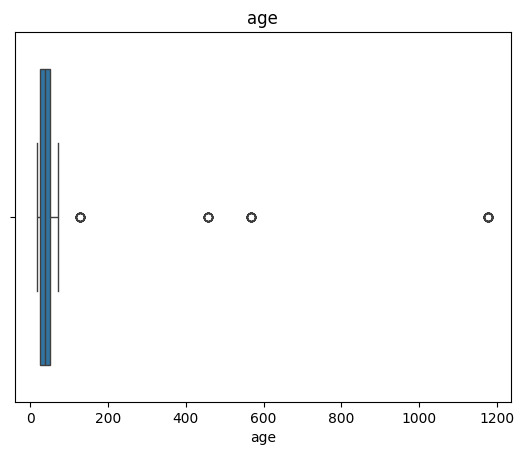

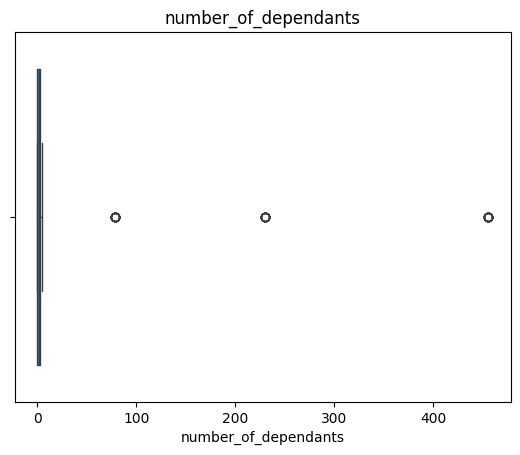

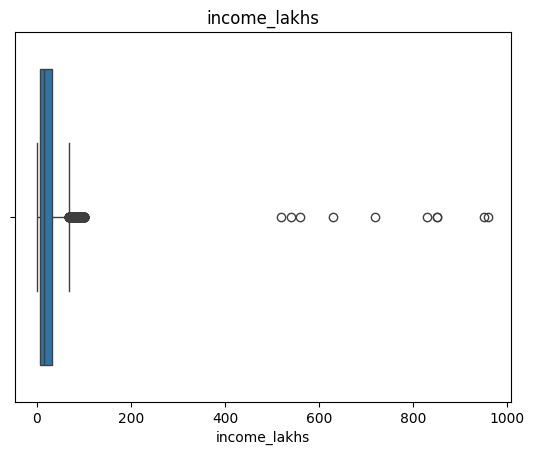

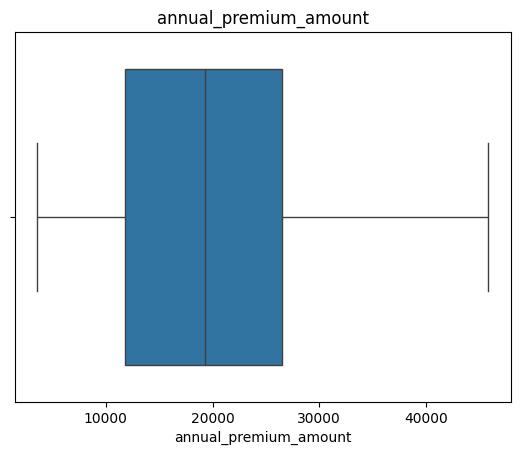

In [65]:
for col in numeric_col:
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

In [66]:
df[df['age']>100]['age'].unique()

array([ 128, 1178,  567,  456])

In [67]:
df1 = df[df.age<=100].copy()
df1.age.describe()

count    9915.000000
mean       37.743621
std        13.975462
min        18.000000
25%        24.000000
50%        37.000000
75%        50.000000
max        72.000000
Name: age, dtype: float64

In [68]:
def get_iqr_bounds(col):
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower= Q1 - IQR * 1.5
    upper = Q3 + IQR * 1.
    print(Q1,Q3,IQR,lower,upper)
    return lower,upper;

In [69]:
_, upper = get_iqr_bounds(df['income_lakhs'])

6.0 31.0 25.0 -31.5 56.0


In [70]:
df1[df1['income_lakhs']>upper]

,age,gender,region,marital_status,physical_activity,stress_level,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
14,43,Female,Southeast,Married,High,Medium,3,Overweight,Occasional,Salaried,> 40L,68,Heart disease,Gold,29376
24,20,Female,Southwest,Unmarried,Low,Medium,1,Overweight,Regular,Freelancer,> 40L,85,No Disease,Silver,16302
46,49,Female,Southeast,Married,Medium,High,2,Normal,No Smoking,Freelancer,> 40L,92,Thyroid,Gold,31057
51,18,Female,Southeast,Unmarried,High,High,0,Normal,No Smoking,Salaried,> 40L,94,No Disease,Silver,11096
72,33,Female,Northwest,Married,High,Medium,4,Normal,No Smoking,Freelancer,> 40L,95,Diabetes,Gold,22998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9957,32,Female,Southeast,Unmarried,Medium,Medium,1,Obesity,No Smoking,Salaried,> 40L,81,No Disease,Gold,25692
9963,37,Male,Southeast,Unmarried,Medium,Low,0,Obesity,No Smoking,Self-Employed,> 40L,64,Diabetes & Heart disease,Bronze,18099
9968,41,Male,Northwest,Unmarried,Low,Low,0,Underweight,No Smoking,Salaried,> 40L,87,Diabetes,Silver,19961
9987,19,Female,Southeast,Unmarried,Low,Low,0,Obesity,No Smoking,Salaried,> 40L,97,No Disease,Gold,18418


In [71]:
thresh=df1['income_lakhs'].quantile(0.999)
thresh

np.float64(136.12000000048283)

In [72]:
df2=df1[df1['income_lakhs']<=thresh].copy()

In [73]:
df2['income_lakhs'].describe()

count    9905.000000
mean       22.676325
std        22.453983
min         1.000000
25%         6.000000
50%        16.000000
75%        31.000000
max       100.000000
Name: income_lakhs, dtype: float64

In [74]:
df2['number_of_dependants'].values

array([2, 5, 0, ..., 0, 0, 3], shape=(9905,))

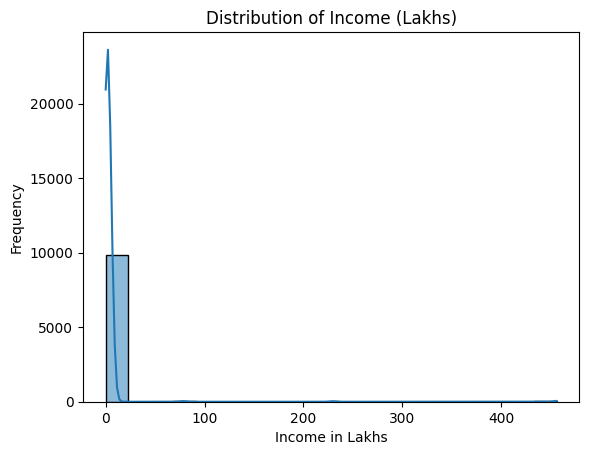

In [75]:
sns.histplot(df1['number_of_dependants'], bins=20, kde=True)

plt.title('Distribution of Income (Lakhs)')
plt.xlabel('Income in Lakhs')
plt.ylabel('Frequency')
plt.show()

In [76]:
dependant_thresold=df2['number_of_dependants'].quantile(0.99)

In [77]:
df2['number_of_dependants'].unique()

array([  2,   5,   0,   3,   1,   4, 456,  78, 230])

In [78]:
df3=df2[df2['number_of_dependants']<=dependant_thresold].copy()

In [79]:
df3['number_of_dependants'].describe()

count    9858.000000
mean        1.919963
std         1.503027
min         0.000000
25%         0.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: number_of_dependants, dtype: float64

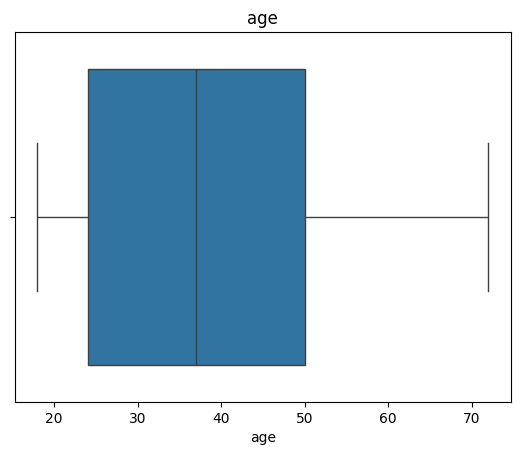

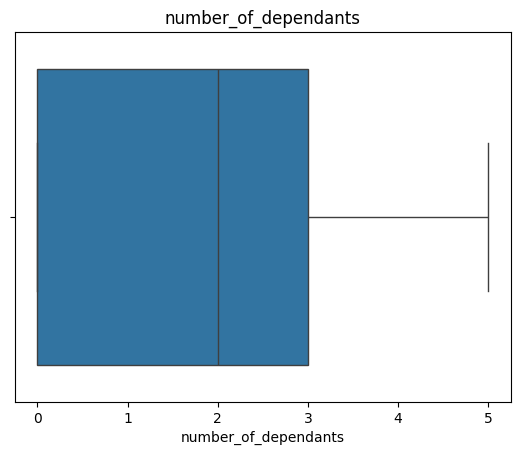

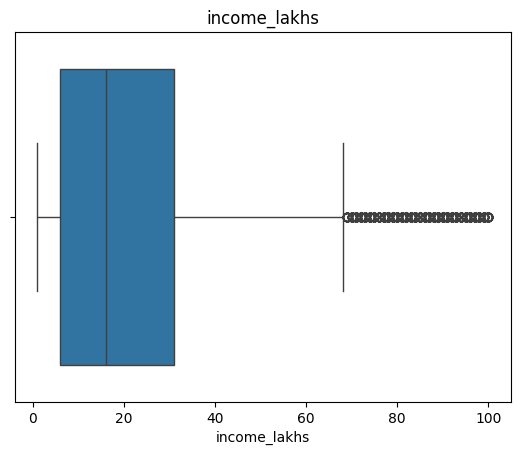

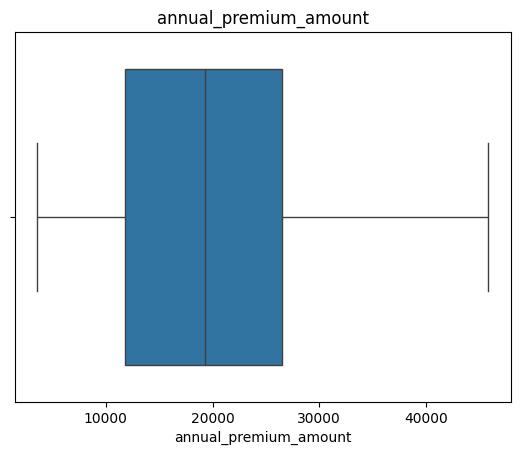

In [80]:
for col in numeric_col:
    sns.boxplot(x=df3[col])
    plt.title(col)
    plt.show()

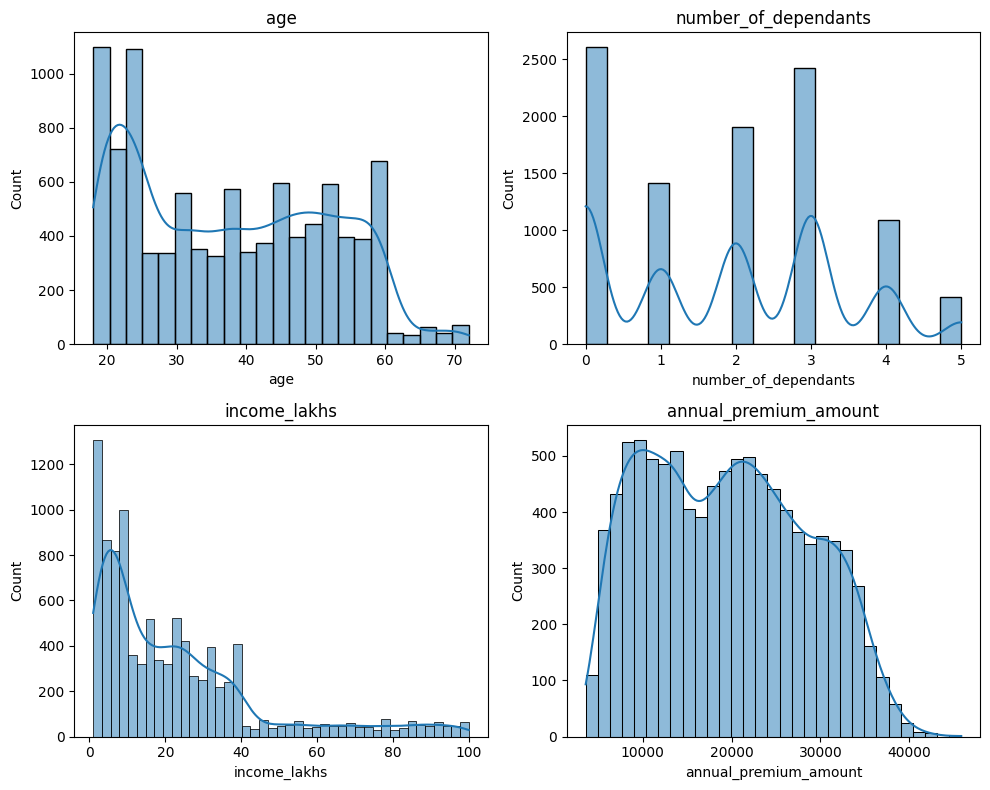

In [81]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))  # Adjust the size as necessary

for i, column in enumerate(numeric_col):
    ax = axs[i//2, i%2]  # Determines the position of the subplot in the grid
    sns.histplot(df3[column], kde=True, ax=ax)
    ax.set_title(column)

plt.tight_layout()
plt.show()

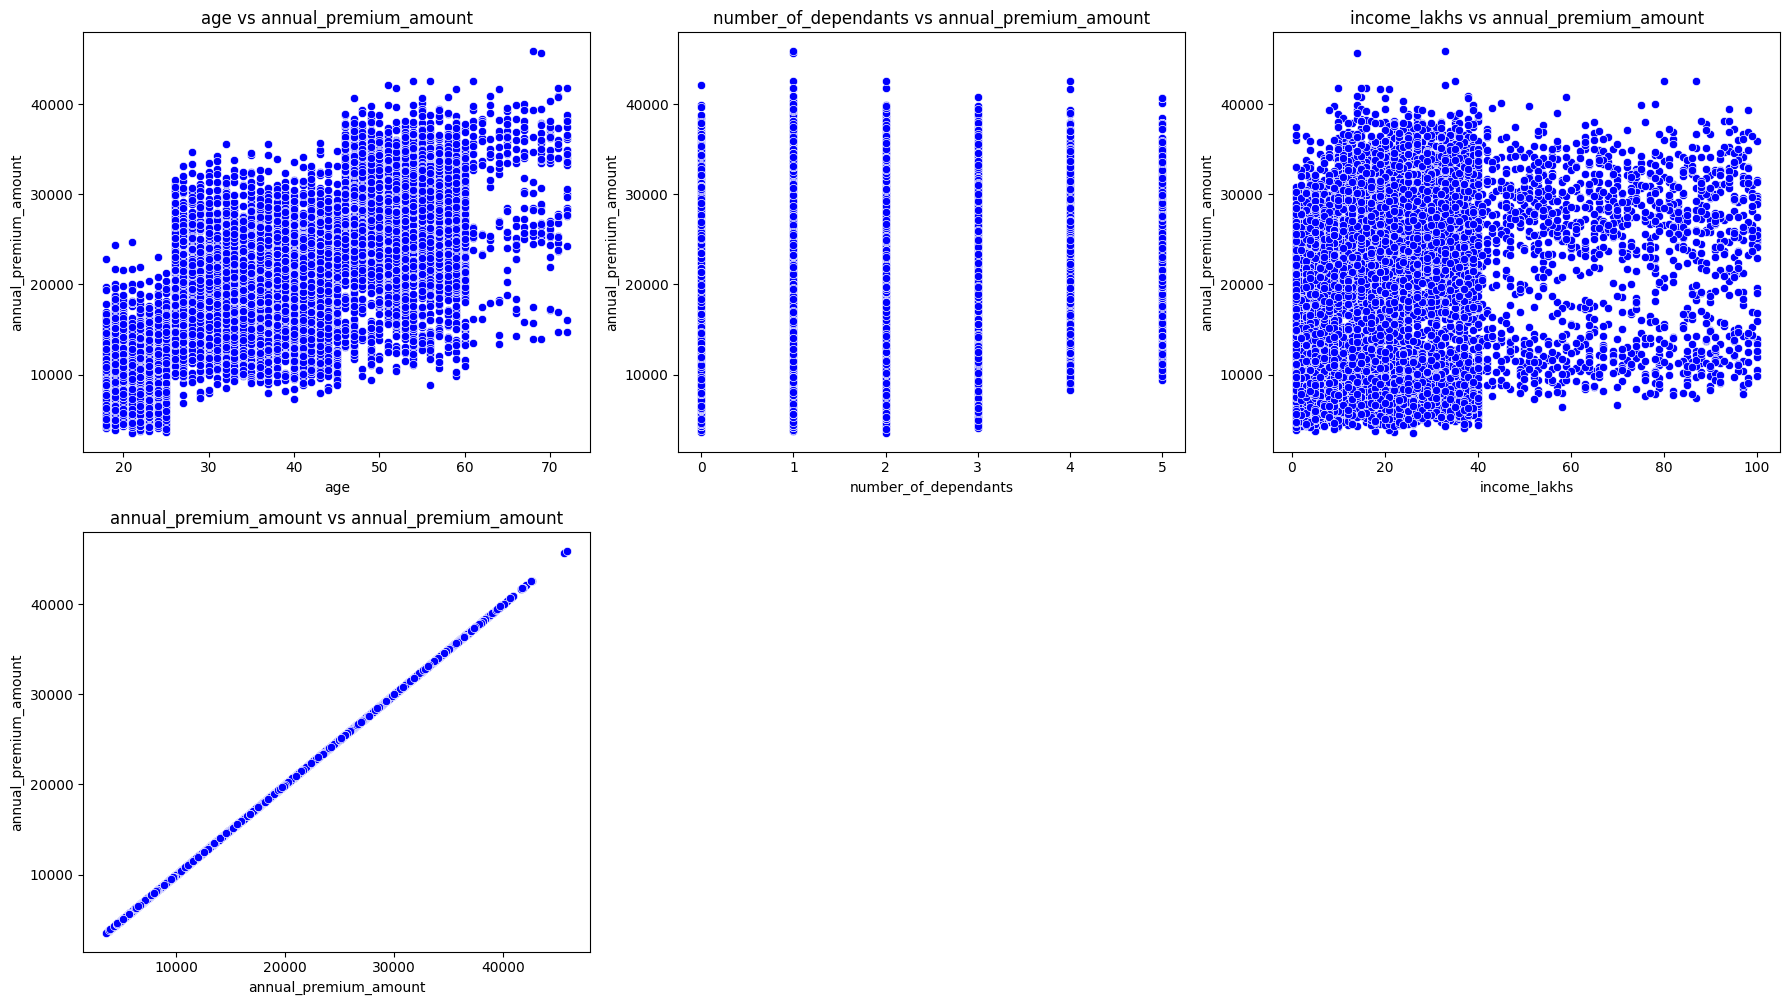

In [97]:
num_cols = len(numeric_col)
num_rows = (num_cols // 3) + (1 if num_cols % 3 else 0)  # Ensures extra row if not perfectly divisible

plt.figure(figsize=(18, 5 * num_rows))  # Adjust height based on number of rows

# Loop to create subplots
for i, col in enumerate(numeric_col):
    plt.subplot(num_rows, 3, i + 1)  # Dynamic rows and columns
    sns.scatterplot(x=df3[col], y=df3['annual_premium_amount'], color='blue')
    plt.title(f'{col} vs annual_premium_amount')
    plt.xlabel(col)
    plt.ylabel('annual_premium_amount')

plt.tight_layout()
plt.show()

In [98]:
categorical_cols = df3.select_dtypes(include=['object']).columns
print(categorical_cols)


Index(['gender', 'region', 'marital_status', 'physical_activity',
       'stress_level', 'bmi_category', 'smoking_status', 'employment_status',
       'medical_history', 'disease1', 'disease2'],
      dtype='object')


In [100]:
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

gender: ['Female' 'Male']
region: ['Southeast' 'Northeast' 'Southwest' 'Northwest']
marital_status: ['Unmarried' 'Married']
physical_activity: ['Medium' 'Low' 'High']
stress_level: ['Medium' 'High' 'Low']
bmi_category: ['Normal' 'Overweight' 'Obesity' 'Underweight']
smoking_status: ['No Smoking' 'Occasional' 'Regular']
employment_status: ['Self-Employed' 'Freelancer' 'Salaried']
medical_history: ['High blood pressure' 'No Disease' 'Thyroid'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid' 'Diabetes'
 'Heart disease' 'Diabetes & High blood pressure'
 'Diabetes & Heart disease']


KeyError: 'disease1'

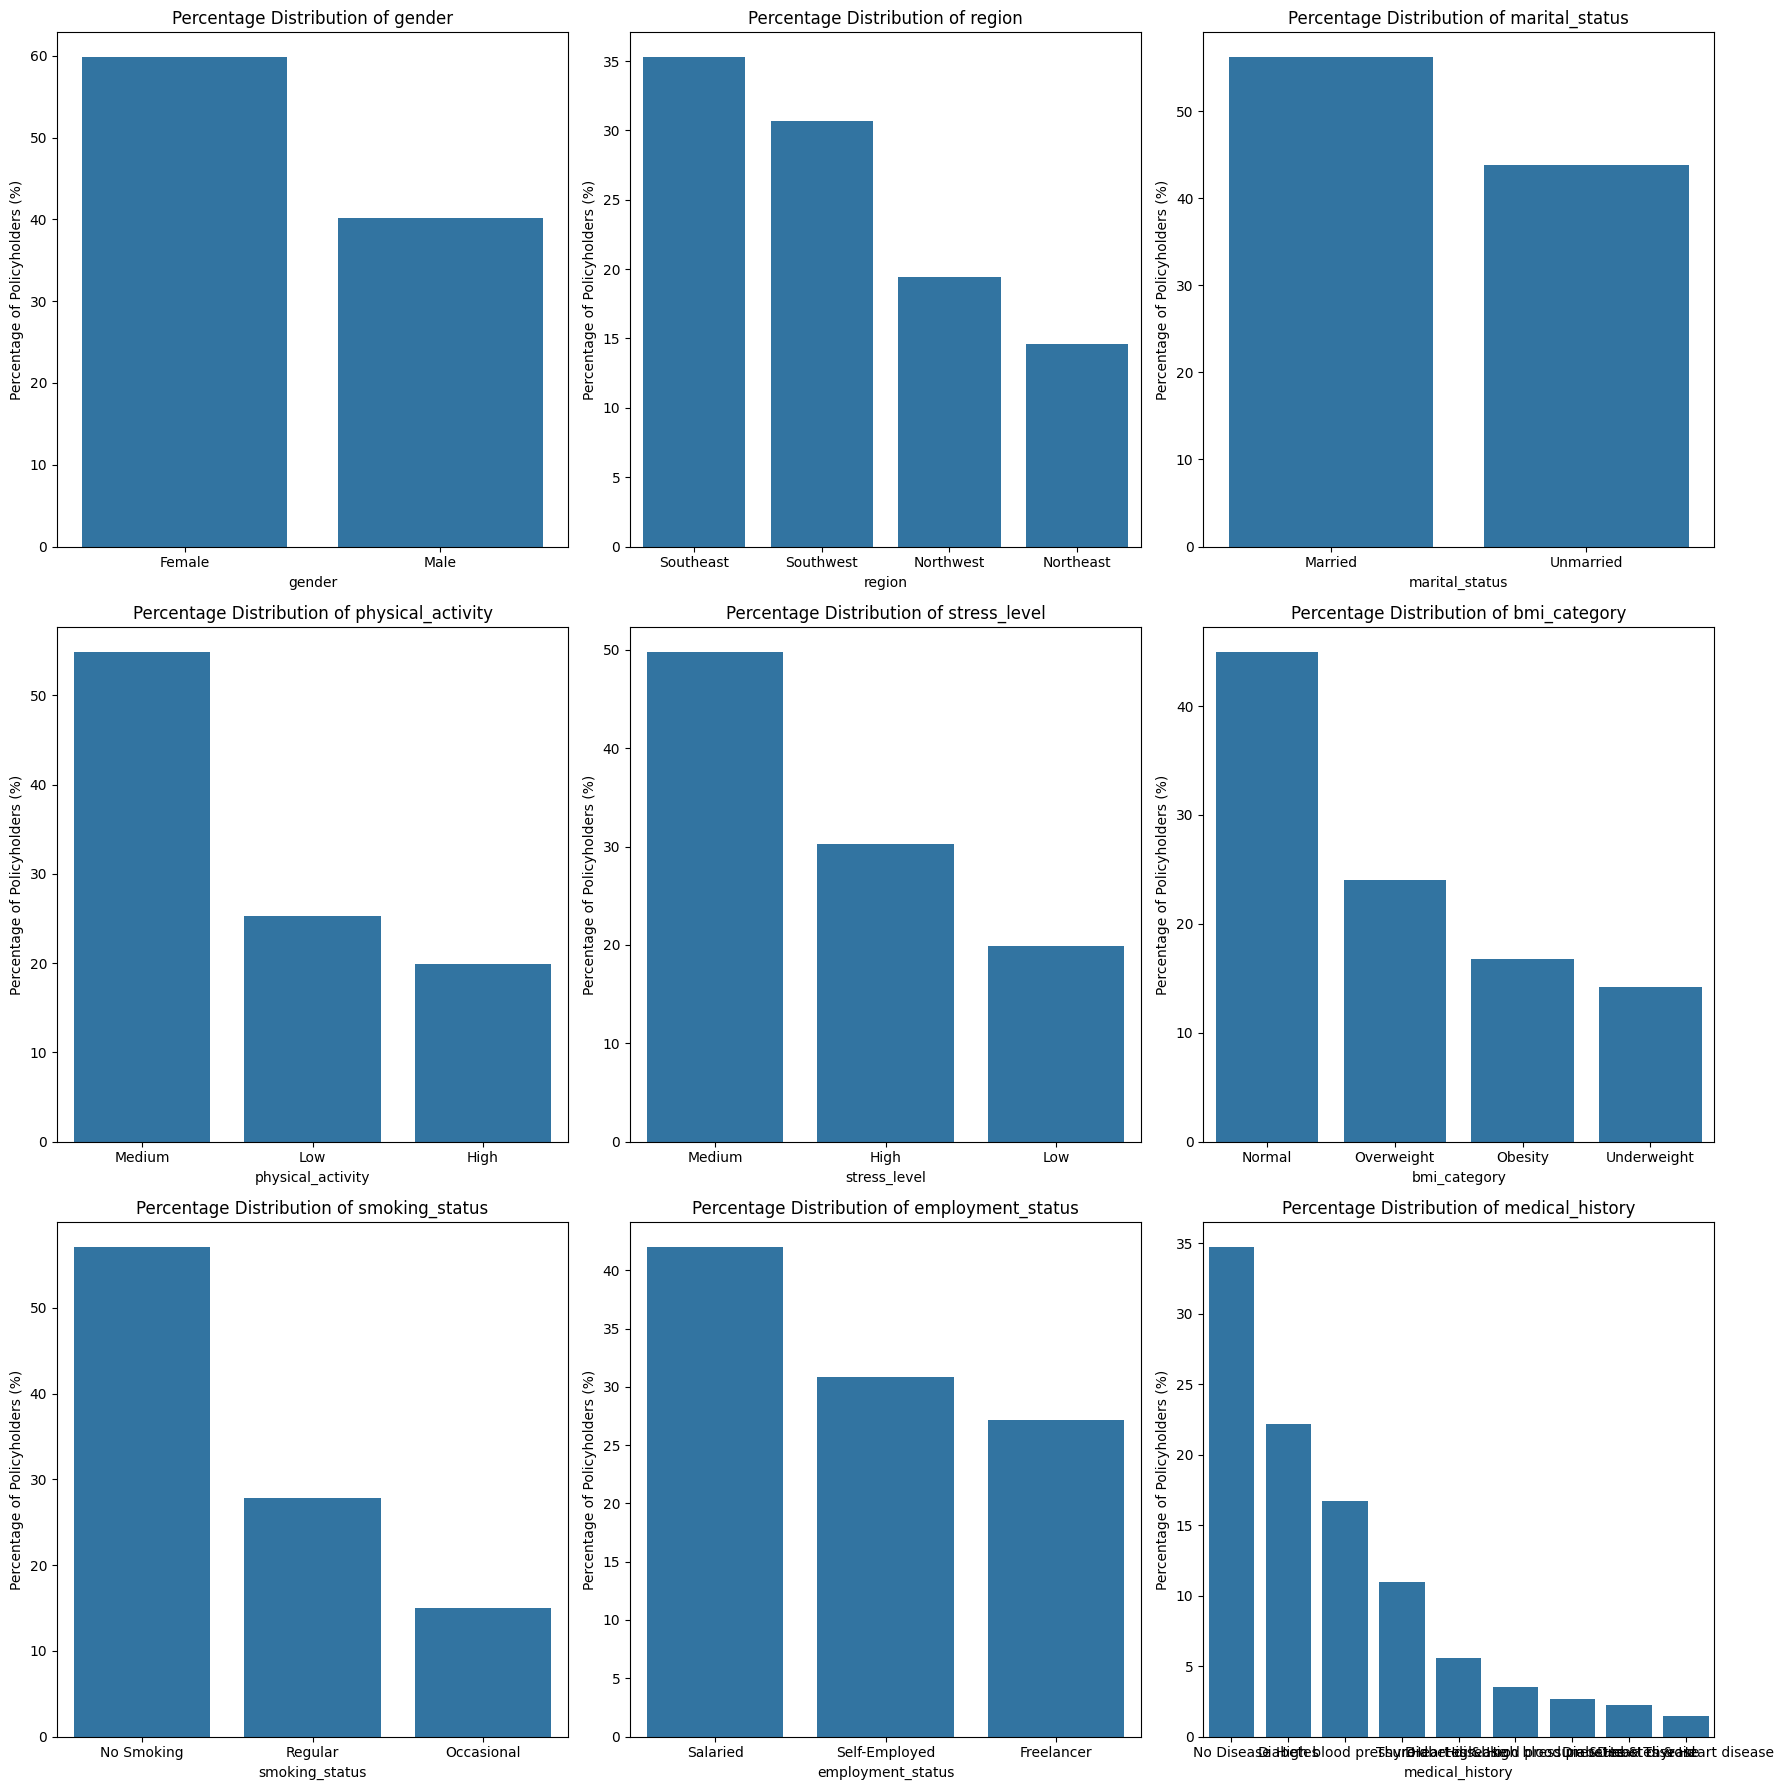

In [101]:
fig, axes = plt.subplots(3, 3, figsize=(18, 18))  # Adjust figure size as necessary
axes = axes.flatten()  # Flatten the 2D array of axes into 1D for easier iteration

for ax, column in zip(axes, categorical_cols):
    # Calculate the percentage distribution of each category
    category_counts = df3[column].value_counts(normalize=True) * 100  # normalize=True gives the relative frequencies
    
    # Plotting the distribution using barplot
    sns.barplot(x=category_counts.index, y=category_counts.values, ax=ax)
    ax.set_title(f'Percentage Distribution of {column}')
    ax.set_ylabel('Percentage of Policyholders (%)')
    ax.set_xlabel(column)  # Set xlabel to the column name for clarity

plt.tight_layout()  # Adjusts plot parameters for better fit in the figure window
plt.show()

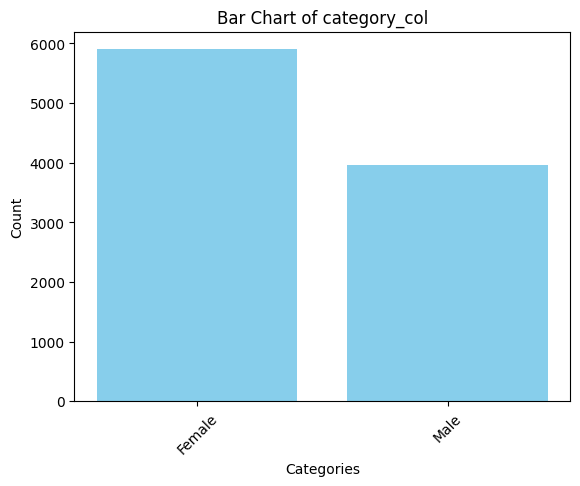

In [102]:
import matplotlib.pyplot as plt

# Example: Bar chart for categorical values and their counts
category_counts = df3['gender'].value_counts()
# Plotting
plt.bar(category_counts.index, category_counts.values, color='skyblue')
plt.title('Bar Chart of category_col')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


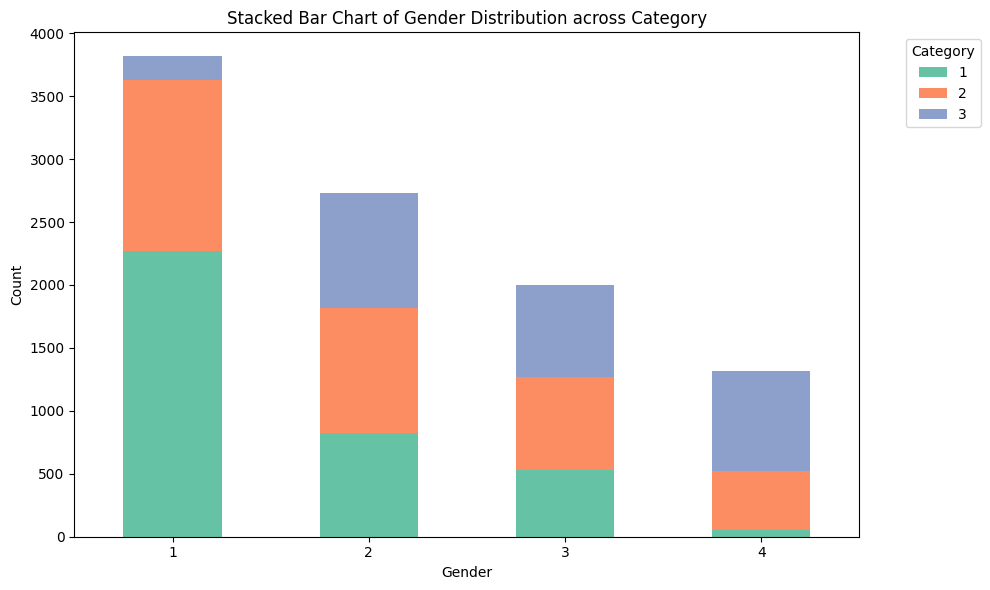

In [103]:
# Create a crosstab of the two columns (gender and category_col)
cross_tab = pd.crosstab(df3['income_level'], df3['insurance_plan'])

# Plot the stacked bar chart
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6), color=sns.color_palette("Set2", len(cross_tab.columns)))

plt.title('Stacked Bar Chart of Gender Distribution across Category')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [104]:
# Define the risk scores for each condition
risk_scores = {
    "diabetes": 6,
    "heart disease": 8,
    "high blood pressure":6,
    "thyroid": 5,
    "no disease": 0,
    "none":0
}

df3[['disease1', 'disease2']] = df3['medical_history'].str.split(" & ", expand=True).apply(lambda x: x.str.lower())
df3['disease1'].fillna('none', inplace=True)
df3['disease2'].fillna('none', inplace=True)
df3['total_risk_score'] = 0

for disease in ['disease1', 'disease2']:
    df3['total_risk_score'] += df3[disease].map(lambda x: risk_scores[x])

# Normalize the risk score to a range of 0 to 1
max_score = df3['total_risk_score'].max()
min_score = df3['total_risk_score'].min()
df3['normalized_risk_score'] = (df3['total_risk_score'] - min_score) / (max_score - min_score)
df3.head(20)

C:\Users\M.Zaid Naeem\AppData\Local\Temp\ipykernel_12908\4052345078.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3['disease1'].fillna('none', inplace=True)
C:\Users\M.Zaid Naeem\AppData\Local\Temp\ipykernel_12908\4052345078.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

,age,gender,region,marital_status,physical_activity,stress_level,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score,lifestyle_risk_score
0,56,Female,Southeast,Unmarried,Medium,Medium,2,Normal,No Smoking,Self-Employed,3,37,High blood pressure,3,27944,high blood pressure,none,6,0.428571,2
1,38,Female,Northeast,Married,Low,High,5,Overweight,Occasional,Freelancer,2,10,No Disease,2,21108,no disease,none,0,0.000000,8
2,18,Female,Southwest,Unmarried,Medium,High,0,Normal,No Smoking,Freelancer,1,9,No Disease,1,8459,no disease,none,0,0.000000,5
3,55,Male,Northeast,Married,High,Medium,3,Overweight,Occasional,Salaried,1,9,Thyroid,2,21685,thyroid,none,5,0.357143,1
4,22,Male,Southeast,Unmarried,Medium,High,2,Normal,Regular,Self-Employed,2,13,High blood pressure & Heart disease,1,15984,high blood pressure,heart disease,14,1.000000,5
5,33,Female,Northwest,Unmarried,Low,High,0,Normal,Regular,Freelancer,1,1,No Disease,3,28388,no disease,none,0,0.000000,8
6,53,Female,Northwest,Unmarried,Medium,Medium,0,Overweight,No Smoking,Self-Employed,1,6,No Disease,2,20959,no disease,none,0,0.000000,2
7,39,Female,Northwest,Married,High,Medium,3,Obesity,No Smoking,Salaried,2,21,Diabetes & Thyroid,2,22640,diabetes,thyroid,11,0.785714,1
8,42,Female,Southeast,Unmarried,Low,Medium,1,Normal,Occasional,Self-Employed,1,6,Thyroid,2,19319,thyroid,none,5,0.357143,5
9,42,Female,Northwest,Married,Medium,Medium,4,Normal,Occasional,Self-Employed,2,18,Diabetes,2,19150,diabetes,none,6,0.428571,2


In [105]:
physical_activity_risk_score = {
    "High": 0,
    "Medium": 1,
    "Low": 4
}
stress_risk_score = {
    "High": 4,
    "Medium": 1,
    "Low": 0
}
df3['lifestyle_risk_score'] = df3['physical_activity'].map(physical_activity_risk_score) +  df3['stress_level'].map(stress_risk_score)

In [106]:
df3

,age,gender,region,marital_status,physical_activity,stress_level,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score,lifestyle_risk_score
0,56,Female,Southeast,Unmarried,Medium,Medium,2,Normal,No Smoking,Self-Employed,3,37,High blood pressure,3,27944,high blood pressure,none,6,0.428571,2
1,38,Female,Northeast,Married,Low,High,5,Overweight,Occasional,Freelancer,2,10,No Disease,2,21108,no disease,none,0,0.000000,8
2,18,Female,Southwest,Unmarried,Medium,High,0,Normal,No Smoking,Freelancer,1,9,No Disease,1,8459,no disease,none,0,0.000000,5
3,55,Male,Northeast,Married,High,Medium,3,Overweight,Occasional,Salaried,1,9,Thyroid,2,21685,thyroid,none,5,0.357143,1
4,22,Male,Southeast,Unmarried,Medium,High,2,Normal,Regular,Self-Employed,2,13,High blood pressure & Heart disease,1,15984,high blood pressure,heart disease,14,1.000000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,31,Male,Northeast,Married,Medium,Medium,5,Overweight,Regular,Freelancer,2,13,Diabetes,2,23032,diabetes,none,6,0.428571,2
9996,24,Male,Southwest,Unmarried,High,Medium,0,Underweight,No Smoking,Freelancer,3,29,High blood pressure,1,7996,high blood pressure,none,6,0.428571,1
9997,18,Male,Southeast,Unmarried,Medium,High,0,Underweight,Regular,Freelancer,1,6,No Disease,2,14605,no disease,none,0,0.000000,5
9998,28,Female,Northwest,Unmarried,High,Low,0,Overweight,Occasional,Self-Employed,3,27,Diabetes,3,25146,diabetes,none,6,0.428571,0


<Axes: xlabel='lifestyle_risk_score', ylabel='Count'>

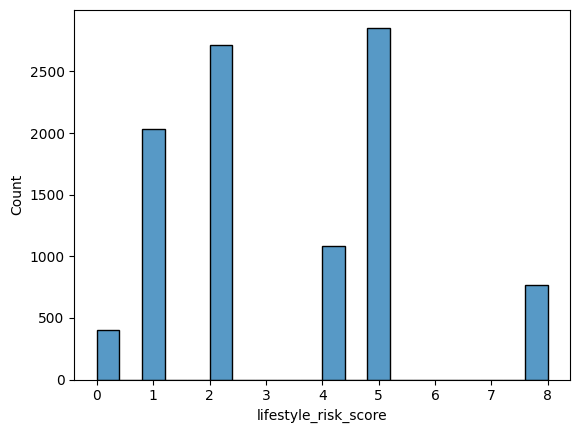

In [107]:
sns.histplot(df3.lifestyle_risk_score, bins=20)

In [108]:
df3['insurance_plan'] = df3['insurance_plan'].map({'Bronze': 1, 'Silver': 2, 'Gold': 3})

In [109]:
df3.head(2)

,age,gender,region,marital_status,physical_activity,stress_level,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score,lifestyle_risk_score
0,56,Female,Southeast,Unmarried,Medium,Medium,2,Normal,No Smoking,Self-Employed,3,37,High blood pressure,NaN,27944,high blood pressure,none,6,0.428571,2
1,38,Female,Northeast,Married,Low,High,5,Overweight,Occasional,Freelancer,2,10,No Disease,NaN,21108,no disease,none,0,0.000000,8


In [110]:
df3.income_level.unique()

array([3, 2, 1, 4])

In [111]:
df3['income_level'] = df3['income_level'].map({'<10L':1, '10L - 25L': 2, '25L - 40L':3, '> 40L':4})

In [142]:
noinmal_cols = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status']
df4 = pd.get_dummies(df3, columns=noinmal_cols, drop_first=True, dtype=int)
df4.head(3)

,age,physical_activity,stress_level,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,56,Medium,Medium,2,NaN,37,High blood pressure,NaN,27944,high blood pressure,...,1,0,1,0,0,0,0,0,0,1
1,38,Low,High,5,NaN,10,No Disease,NaN,21108,no disease,...,0,0,0,0,1,0,1,0,0,0
2,18,Medium,High,0,NaN,9,No Disease,NaN,8459,no disease,...,0,1,1,0,0,0,0,0,0,0


In [143]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9858 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              9858 non-null   int64  
 1   physical_activity                9858 non-null   object 
 2   stress_level                     9858 non-null   object 
 3   number_of_dependants             9858 non-null   int64  
 4   income_level                     0 non-null      float64
 5   income_lakhs                     9858 non-null   int64  
 6   medical_history                  9858 non-null   object 
 7   insurance_plan                   0 non-null      float64
 8   annual_premium_amount            9858 non-null   int64  
 9   disease1                         9858 non-null   object 
 10  disease2                         9858 non-null   object 
 11  total_risk_score                 9858 non-null   int64  
 12  normalized_risk_score    

In [144]:
df5 = df4.drop(['medical_history','disease1', 'disease2', 'total_risk_score','physical_activity','stress_level'], axis=1)
df5.head(3)                

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,normalized_risk_score,lifestyle_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,56,2,NaN,37,NaN,27944,0.428571,2,0,0,1,0,1,0,0,0,0,0,0,1
1,38,5,NaN,10,NaN,21108,0.000000,8,0,0,0,0,0,0,1,0,1,0,0,0
2,18,0,NaN,9,NaN,8459,0.000000,5,0,0,0,1,1,0,0,0,0,0,0,0


In [145]:
df5.shape

(9858, 20)

In [146]:
df5.columns

Index(['age', 'number_of_dependants', 'income_level', 'income_lakhs',
       'insurance_plan', 'annual_premium_amount', 'normalized_risk_score',
       'lifestyle_risk_score', 'gender_Male', 'region_Northwest',
       'region_Southeast', 'region_Southwest', 'marital_status_Unmarried',
       'bmi_category_Obesity', 'bmi_category_Overweight',
       'bmi_category_Underweight', 'smoking_status_Occasional',
       'smoking_status_Regular', 'employment_status_Salaried',
       'employment_status_Self-Employed'],
      dtype='object')

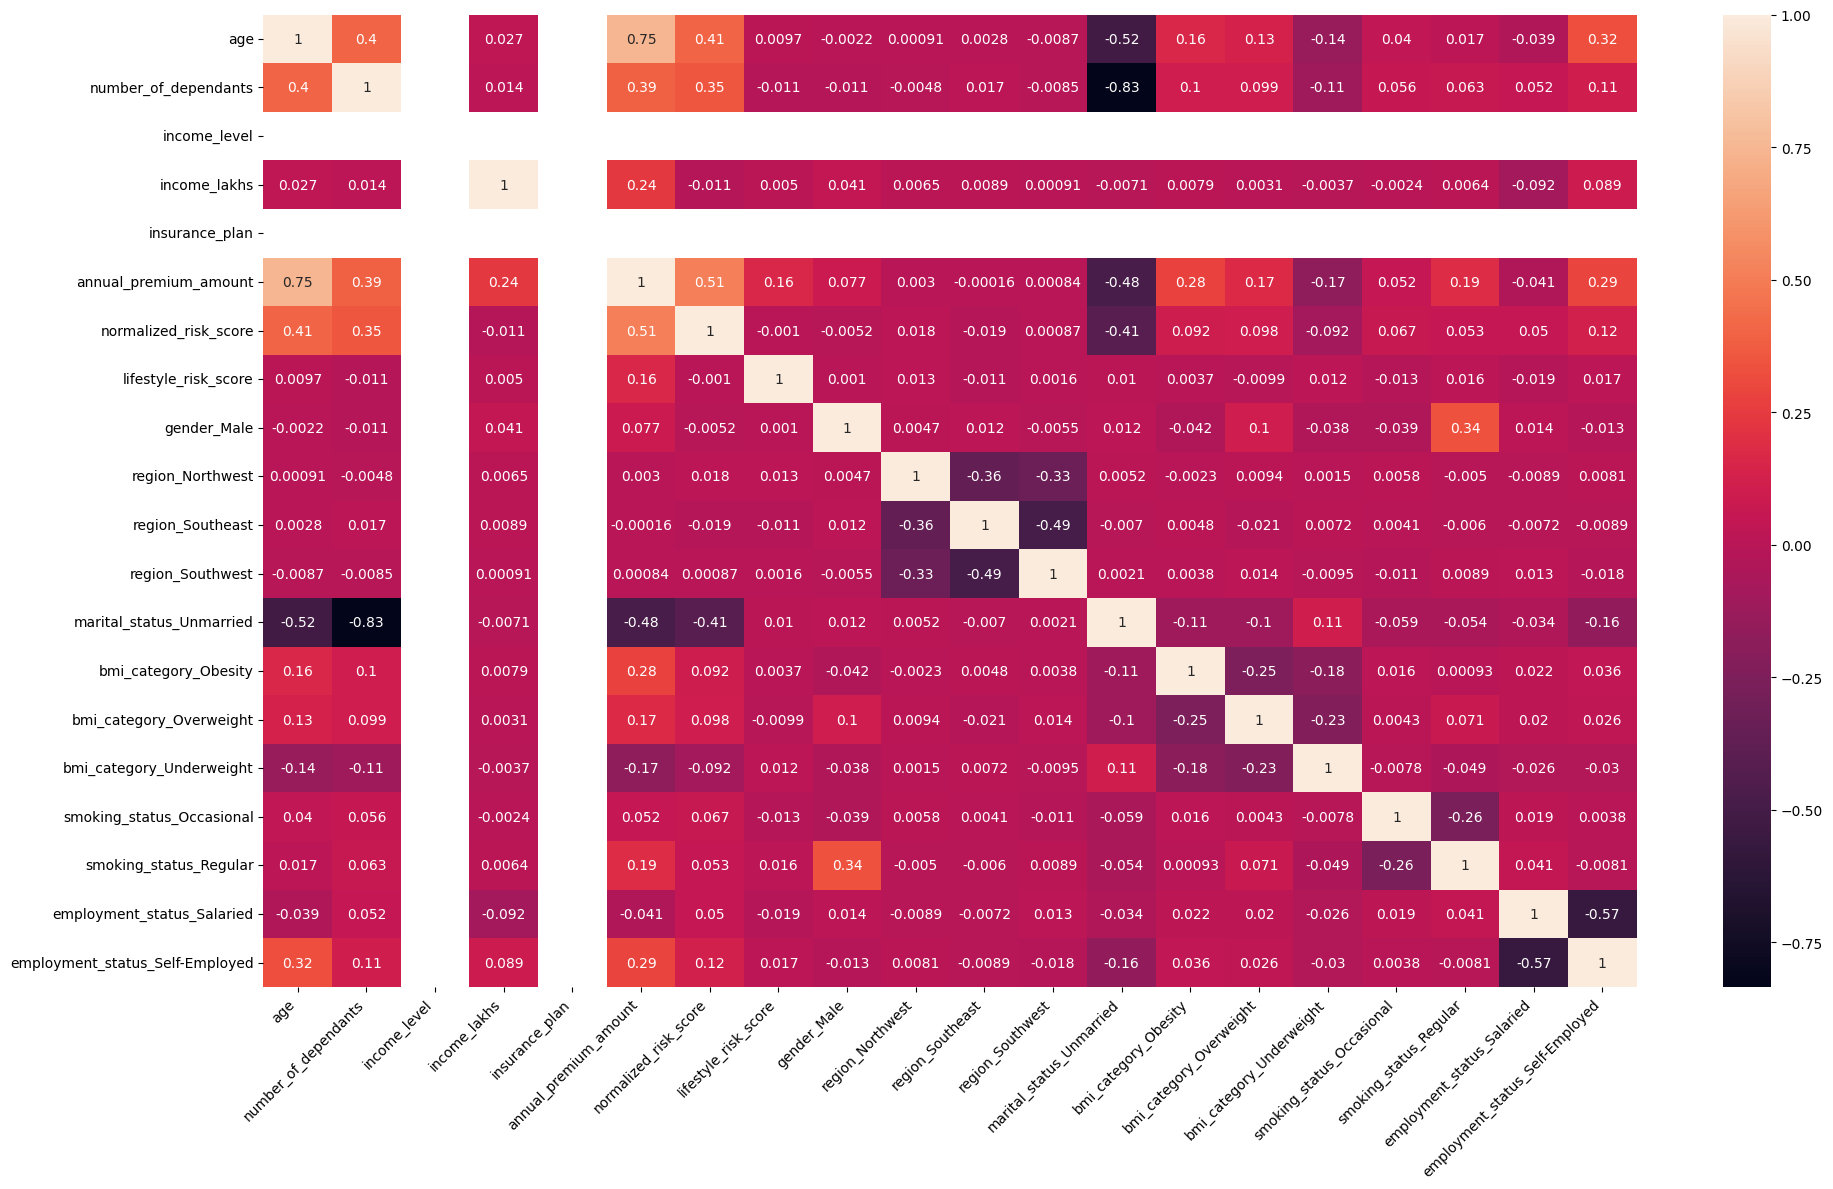

In [147]:
cm = df5.corr()

plt.figure(figsize=(20,12))
sns.heatmap(cm, annot=True)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [148]:
abs(df5.corr()['annual_premium_amount'])

age                                0.749157
number_of_dependants               0.389648
income_level                            NaN
income_lakhs                       0.239678
insurance_plan                          NaN
annual_premium_amount              1.000000
normalized_risk_score              0.507899
lifestyle_risk_score               0.157561
gender_Male                        0.077459
region_Northwest                   0.002971
region_Southeast                   0.000155
region_Southwest                   0.000841
marital_status_Unmarried           0.477838
bmi_category_Obesity               0.281224
bmi_category_Overweight            0.172505
bmi_category_Underweight           0.171483
smoking_status_Occasional          0.051506
smoking_status_Regular             0.189227
employment_status_Salaried         0.041205
employment_status_Self-Employed    0.287970
Name: annual_premium_amount, dtype: float64

In [158]:
X = df5.drop('annual_premium_amount', axis='columns')
y = df5['annual_premium_amount']

from sklearn.preprocessing import MinMaxScaler

cols_to_scale = ['age','number_of_dependants', 'income_level',  'income_lakhs', 'insurance_plan', 'lifestyle_risk_score']
scaler = MinMaxScaler()

X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
X.describe()

C:\Users\M.Zaid Naeem\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\_array_api.py:776: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
C:\Users\M.Zaid Naeem\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\_array_api.py:793: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalized_risk_score,lifestyle_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,9858.000000,9858.000000,0.0,9858.000000,0.0,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000
mean,0.366014,0.383993,NaN,0.219027,NaN,0.326537,0.408349,0.401298,0.194664,0.353013,0.306452,0.437716,0.167985,0.240414,0.141712,0.150030,0.278657,0.420065,0.308176
std,0.258820,0.300605,NaN,0.226801,NaN,0.279083,0.268302,0.490186,0.395962,0.477931,0.461043,0.496131,0.373872,0.427356,0.348773,0.357119,0.448361,0.493594,0.461763
min,0.000000,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.111111,0.000000,NaN,0.050505,NaN,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.351852,0.400000,NaN,0.151515,NaN,0.428571,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.592593,0.600000,NaN,0.303030,NaN,0.428571,0.625000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,NaN,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [159]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [160]:
vif=calculate_vif(X)
vif

MissingDataError: exog contains inf or nans

In [ ]:
df5.drop('income_level',axis=1)

In [ ]:
# we will drop income_lakhs due to high VIF value
X_reduced = X.drop('income_level', axis="columns")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.30, random_state=10)

# shape of the X_train, X_test, y_train, y_test features
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

In [ ]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
test_score = model_lr.score(X_test, y_test)
train_score = model_lr.score(X_train, y_train)
train_score, test_score

In [ ]:
y_pred = model_lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)
print("Linear Regression ==> MSE: ", mse_lr, "RMSE: ", rmse_lr)

In [ ]:
X_test.shape

In [ ]:
model_lr.coef_

In [ ]:
np.set_printoptions(suppress=True, precision=6)
model_lr.coef_

In [ ]:
feature_importance = model_lr.coef_

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Linear Regression')
plt.show()

In [ ]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor(n_estimators=20, max_depth=3)
model_xgb.fit(X_train, y_train)
model_xgb.score(X_test, y_test)

In [ ]:
y_pred = model_xgb.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)
print("XGBoost Regression ==> MSE: ", mse_lr, "RMSE: ", rmse_lr)

In [ ]:
model_xgb = XGBRegressor()
param_grid = {
    'n_estimators': [20, 40, 50],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}
random_search = RandomizedSearchCV(model_xgb, param_grid, n_iter=10, cv=3, scoring='r2', random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)
random_search.best_score_

In [ ]:
random_search.best_params_

In [ ]:
best_model = random_search.best_estimator_

In [ ]:
feature_importance = best_model.feature_importances_

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in XGBoost')
plt.show()

In [152]:
y_pred = best_model.predict(X_test)

residuals = y_pred - y_test
residuals_pct = (residuals / y_test) * 100

results_df = pd.DataFrame({
    'actual': y_test, 
    'predicted': y_pred, 
    'diff': residuals, 
    'diff_pct': residuals_pct
})
results_df

NameError: name 'best_model' is not defined

In [153]:
X_test.shape

NameError: name 'X_test' is not defined

In [154]:
extreme_error_threshold = 10  # You can adjust this threshold based on your domain knowledge or requirements
extreme_results_df = results_df[np.abs(results_df['diff_pct']) > extreme_error_threshold]
extreme_results_df.head()

NameError: name 'results_df' is not defined

In [155]:
extreme_results_df.shape

NameError: name 'extreme_results_df' is not defined

In [156]:
extreme_errors_pct = extreme_results_df.shape[0]*100/X_test.shape[0]
extreme_errors_pct

NameError: name 'extreme_results_df' is not defined

In [157]:
df.loc[extreme_results_df.index, df.columns[0]]

NameError: name 'extreme_results_df' is not defined